In [1]:
import pandas as pd

In [2]:
from glob import glob

In [3]:
import os

In [4]:
!head gpuotf_512_512_h10750_1024.txt

512,512,1024,0.087756,0.076416,0.001756
512,512,1024,0.084168,0.076078,0.001728
512,512,1024,0.085939,0.076084,0.001767
512,512,1024,0.086967,0.076077,0.001747
512,512,1024,0.083525,0.076127,0.001729


In [5]:
cols = {'cpuotf': "n_in n_out n_samples _ alloc compute".split(),
        'cpumat': "n_in n_out n_samples alloc1 materialize alloc2 compute".split(),
        'gpumat': "n_in n_out n_samples materialize copy1 compute copy2".split(),
        'gpuotf': "n_in n_out n_samples copy1 compute copy2".split(),
       }

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_context(context="paper", font_scale=2)
sns.set_style("whitegrid")

In [7]:
from scipy.stats import sem

In [38]:
frames = {key: pd.DataFrame(columns=val) for key, val in cols.items()}

In [39]:
for f in glob("*.txt"):
    algo, _, _, h, nsamp = os.path.splitext(f)[0].split("_")
    #if algo == 'matgpu':
    h = int(h[1:])
    df = pd.read_csv(f, header=None, names=cols[algo])
    df["n_buckets"] = h
    frames[algo] = frames[algo].append(df, ignore_index=True)

In [40]:
cpuotf = frames["cpuotf"].drop("_", axis=1).groupby(["n_buckets", "n_samples"]).agg(
    {"compute": [np.median, sem]}
)

In [41]:
frames["cpumat"]["total"] = frames["cpumat"]["compute"] + frames["cpumat"]["materialize"]
cpumat = frames["cpumat"].groupby(["n_buckets", "n_samples"]).agg(
    {"compute": [np.median, sem],
     "materialize": [np.median, sem],
     "total": [np.median, sem]}
)

In [42]:
frames["gpumat"]["total"] = frames["gpumat"]["compute"] + frames["gpumat"]["materialize"] + frames["gpumat"]["copy1"] + frames["gpumat"]["copy2"]
gpumat = frames["gpumat"].groupby(["n_buckets", "n_samples"]).agg(
    {"compute": [np.median, sem],
     "materialize": [np.median, sem],
     "copy1": [np.median, sem],
     "copy2": [np.median, sem],
     "total": [np.median, sem]}
)

In [43]:
frames["gpuotf"]["total"] = frames["gpuotf"]["compute"] + frames["gpuotf"]["copy1"] + frames["gpuotf"]["copy2"]
gpuotf = frames["gpuotf"].groupby(["n_buckets", "n_samples"]).agg(
    {"compute": [np.median, sem],
     "copy1": [np.median, sem],
     "copy2": [np.median, sem],
     "total": [np.median, sem]}
)

In [44]:
mkdir plots

mkdir: cannot create directory ‘plots’: File exists


/home/vlad/conda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


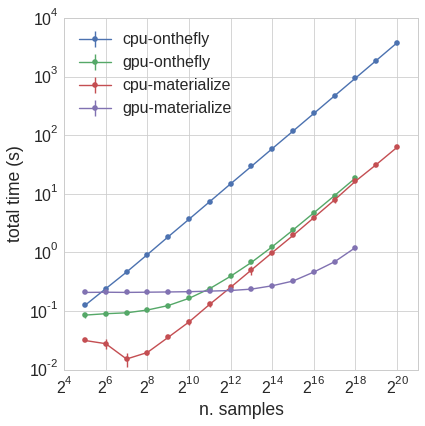

In [77]:
plt.figure(figsize=(6, 6))
hh = 10750
df = cpumat.dropna().ix[hh]
#df = matcpu.ix[hh]
#plt.errorbar(df.index, df['total']['median'], yerr=1.96 * df['total']['sem'].values,
#             marker="o",
#              label="matcpu")
df = cpuotf.dropna().ix[hh]
plt.errorbar(df.index, df['compute']['median'], yerr=1.96 * df['compute']['sem'].values,
             marker="o",
             label="cpu-onthefly", capsize=2)

df = gpuotf.dropna().ix[hh]
plt.errorbar(df.index, df['total']['median'], yerr=1.96 * df['total']['sem'].values,
             marker="o",
             label="gpu-onthefly", capsize=2)

df = cpumat.dropna().ix[hh]
plt.errorbar(df.index, df['total']['median'], yerr=1.96 * df['total']['sem'].values,
             marker="o",
             label="cpu-materialize", capsize=2)

df = gpumat.dropna().ix[hh]
plt.errorbar(df.index, df['total']['median'], yerr=1.96 * df['total']['sem'].values,
             marker="o",
             label="gpu-materialize", capsize=2)


plt.legend(loc="upper left")
plt.loglog(basex=2, basey=10)
plt.xlim(16, 2 ** 21)
#plt.ylim(0.0001, 100)
plt.xlabel('n. samples')
plt.ylabel('total time (s)')
plt.tight_layout()
plt.savefig("plots/total_time.pdf")

/home/vlad/conda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


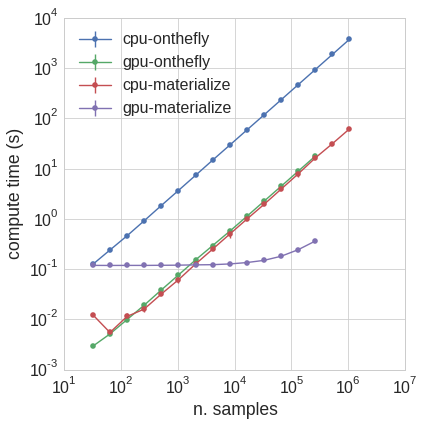

In [78]:
plt.figure(figsize=(6, 6))
hh = 10750
df = cpumat.dropna().ix[hh]
#df = matcpu.ix[hh]
#plt.errorbar(df.index, df['total']['median'], yerr=1.96 * df['total']['sem'].values,
#             marker="o",
#              label="matcpu")
df = cpuotf.dropna().ix[hh]
plt.errorbar(df.index, df['compute']['median'], yerr=1.96 * df['compute']['sem'].values,
             marker="o",
             label="cpu-onthefly", capsize=2)

df = gpuotf.dropna().ix[hh]
plt.errorbar(df.index, df['compute']['median'], yerr=1.96 * df['compute']['sem'].values,
             marker="o",
             label="gpu-onthefly", capsize=2)

df = cpumat.dropna().ix[hh]
plt.errorbar(df.index, df['compute']['median'], yerr=1.96 * df['compute']['sem'].values,
             marker="o",
             label="cpu-materialize", capsize=2)

df = gpumat.dropna().ix[hh]
plt.errorbar(df.index, df['compute']['median'], yerr=1.96 * df['compute']['sem'].values,
             marker="o",
             label="gpu-materialize", capsize=2)


plt.legend(loc="upper left")
plt.loglog()
#plt.ylim(10**-2, 1000)

#plt.xlim(100, 30000)
plt.xlabel('n. samples')
plt.ylabel('compute time (s)')
plt.tight_layout()
plt.savefig("plots/compute_time.pdf")

/home/vlad/conda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


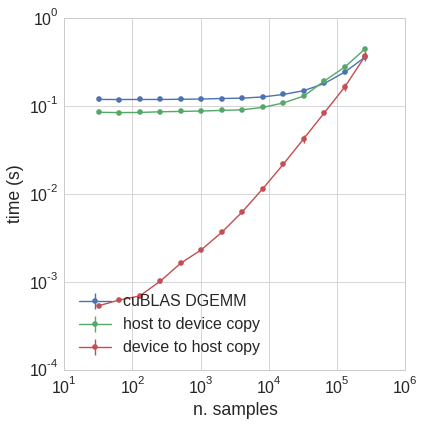

In [52]:
plt.figure(figsize=(6, 6))
hh = 10750
df = gpumat.ix[hh]
plt.errorbar(df.index, df['compute']['median'], yerr=1.96 * df['compute']['sem'].values,
             marker="o", capsize=2,
             label="cuBLAS DGEMM")

plt.errorbar(df.index, df['copy1']['median'], yerr=1.96 * df['copy1']['sem'].values,
             marker="o", capsize=2,
             label="host to device copy")

plt.errorbar(df.index, df['copy2']['median'], yerr=1.96 * df['copy2']['sem'].values,
             marker="o", capsize=2,
             label="device to host copy")
plt.legend(loc="lower left")
plt.xlabel("n. samples")
plt.ylabel("time (s)")
plt.loglog()

plt.tight_layout()
#plt.savefig("plots/gpu_breakdown.pdf")

/home/vlad/conda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


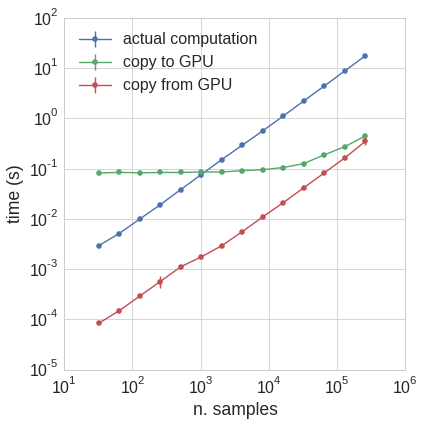

In [79]:
plt.figure(figsize=(6, 6))
hh = 10750
df = gpuotf.ix[hh]
plt.errorbar(df.index, df['compute']['median'], yerr=1.96 * df['compute']['sem'].values,
             marker="o", capsize=2,
             label="actual computation")

plt.errorbar(df.index, df['copy1']['median'], yerr=1.96 * df['copy1']['sem'].values,
             marker="o", capsize=2,
             label="copy to GPU")

plt.errorbar(df.index, df['copy2']['median'], yerr=1.96 * df['copy2']['sem'].values,
             marker="o", capsize=2,
             label="copy from GPU")
plt.legend(loc="upper left")
plt.xlabel("n. samples")
plt.ylabel("time (s)")
plt.loglog()

plt.tight_layout()
plt.savefig("plots/gpu_breakdown.pdf")

In [27]:
plt.figure(figsize=(6, 6))
hh = 1999
df = gpuotf.ix[hh]
plt.errorbar(df.index, df['compute']['median'], yerr=1.96 * df['compute']['sem'].values,
             marker="o", capsize=2,
             label="gpu-onthefly")

plt.errorbar(df.index, df['copy1']['median'], yerr=1.96 * df['copy1']['sem'].values,
             marker="o", capsize=2,
             label="htd-otf copy")

plt.errorbar(df.index, df['copy2']['median'], yerr=1.96 * df['copy2']['sem'].values,
             marker="o", capsize=2,
             label="dth-otf copy")


df = gpumat.ix[hh]
plt.errorbar(df.index, df['compute']['median'], yerr=1.96 * df['compute']['sem'].values,
             marker="o", capsize=2,
             label="SGEMM")

plt.errorbar(df.index, df['copy1']['median'], yerr=1.96 * df['copy1']['sem'].values,
             marker="o", capsize=2,
             label="htd-mat copy")b


plt.errorbar(df.index, df['copy2']['median'], yerr=1.96 * df['copy2']['sem'].values,
             marker="o", capsize=2,
             label="dth-mat copy")

plt.legend(loc="upper left")
plt.xlabel("n. samples")
plt.ylabel("time (s)")
plt.loglog()

plt.tight_layout()
#plt.savefig("plots/gpu_breakdown.pdf")

SyntaxError: invalid syntax (<ipython-input-27-3cac47311adf>, line 24)

/home/vlad/conda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


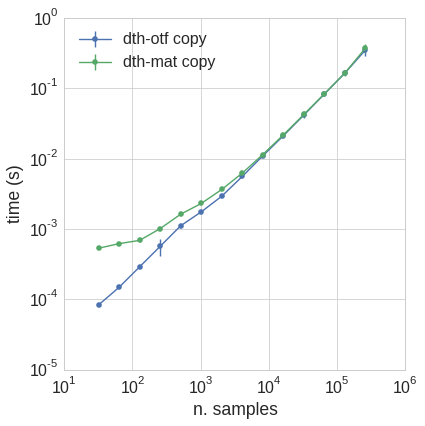

In [50]:
plt.figure(figsize=(6, 6))
hh = 10750
df = gpuotf.ix[hh]
plt.errorbar(df.index, df['copy2']['median'], yerr=1.96 * df['copy2']['sem'].values,
             marker="o", capsize=2,
             label="dth-otf copy")


df = gpumat.ix[hh]
plt.errorbar(df.index, df['copy2']['median'], yerr=1.96 * df['copy2']['sem'].values,
             marker="o", capsize=2,
             label="dth-mat copy")

plt.legend(loc="upper left")
plt.xlabel("n. samples")
plt.ylabel("time (s)")
plt.loglog()

plt.tight_layout()
#plt.savefig("plots/gpu_breakdown.pdf")

In [49]:
d_in = d_out = 32768
d_in = d_out = 131072

In [54]:
(512 * 512) / 10750

24.385488372093022

In [76]:
(32768 ** 2) / (1024 * 10750)

97.54195348837209

In [60]:
32 * 32

1024

In [75]:
32768 / 32

1024.0

In [65]:
ls plots/

compute_time.pdf  gpu_breakdown.pdf  total_time.pdf


In [62]:
4000 * 10750 + 64 * 32768  # 180MB, cheap.

45097152

In [74]:
N = 64
B = 16
for i in range(N):
    for j in range(N):
        print((i // B) * (N // B) +  (j // B), end="")
    print()

0000000000000000111111111111111122222222222222223333333333333333
0000000000000000111111111111111122222222222222223333333333333333
0000000000000000111111111111111122222222222222223333333333333333
0000000000000000111111111111111122222222222222223333333333333333
0000000000000000111111111111111122222222222222223333333333333333
0000000000000000111111111111111122222222222222223333333333333333
0000000000000000111111111111111122222222222222223333333333333333
0000000000000000111111111111111122222222222222223333333333333333
0000000000000000111111111111111122222222222222223333333333333333
0000000000000000111111111111111122222222222222223333333333333333
0000000000000000111111111111111122222222222222223333333333333333
0000000000000000111111111111111122222222222222223333333333333333
0000000000000000111111111111111122222222222222223333333333333333
0000000000000000111111111111111122222222222222223333333333333333
0000000000000000111111111111111122222222222222223333333333333333
0000000000000000111111111

In [ ]:
bucket_indices

/home/vlad/conda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


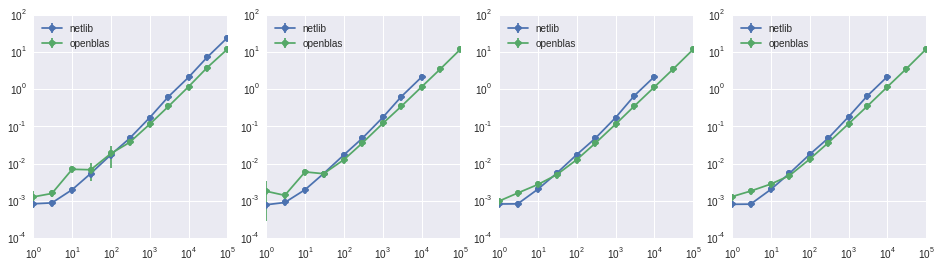

In [171]:
plt.figure(figsize=(16, 4))
for subplot, hh in enumerate([10, 100, 1000, 10000]):
    plt.subplot(1, 4, 1 + subplot)
    df = matcpu.ix[hh]
    plt.errorbar(df.index, df['compute']['median'], yerr=1.96 * df['compute']['sem'].values,
                 marker="o",
                 label="netlib")
    df = matcpuob.ix[hh]
    plt.errorbar(df.index, df['compute']['median'], yerr=1.96 * df['compute']['sem'].values,
                 marker="o",
                 label="openblas")
    plt.legend(loc="upper left")
    plt.loglog()
    plt.ylim(0.0001, 100)

/home/vlad/conda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


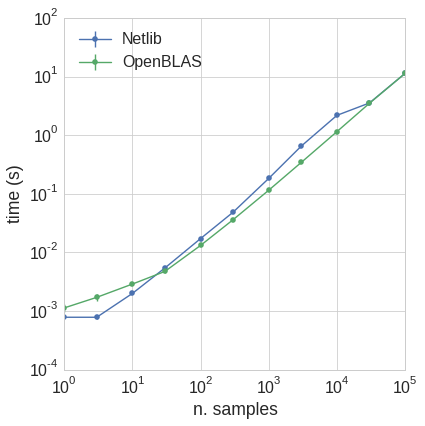

In [62]:
plt.figure(figsize=(6, 6))
#for subplot, hh in enumerate([10,  10000]):
df = matcpu.ix[hh]
plt.errorbar(df.index, df['compute']['median'], yerr=1.96 * df['compute']['sem'].values,
             marker="o",
             label="Netlib")
df = matcpuob.ix[hh]
plt.errorbar(df.index, df['compute']['median'], yerr=1.96 * df['compute']['sem'].values,
             marker="o",
             label="OpenBLAS")
plt.legend(loc="upper left")
plt.loglog()
#plt.ylim(0.0001, 100)
plt.xlabel("n. samples")
plt.ylabel("time (s)")
plt.tight_layout()
plt.savefig("plots/blas.pdf")

/home/vlad/conda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


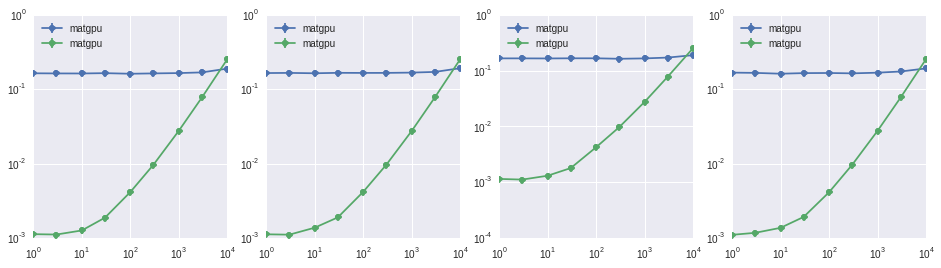

In [152]:
plt.figure(figsize=(16, 4))
for subplot, hh in enumerate([10, 100, 1000, 10000]):
    plt.subplot(1, 4, 1 + subplot)
    df = matgpu.ix[hh]
    plt.errorbar(df.index, df['copy1']['mean'], yerr=1.96 * df['copy1']['sem'].values,
                 marker="o",
                 label="matgpu")
    plt.errorbar(df.index, df['copy2']['mean'], yerr=1.96 * df['copy2']['sem'].values,
                 marker="o",
                 label="matgpu")
    plt.legend(loc="upper left")
    plt.loglog()

In [61]:
matcpuob

total              compute           materialize  \
                        median       sem     median       sem      median   
n_buckets n_samples                                                         
10        1           0.012479  0.000898   0.001038  0.000314    0.011467   
          3           0.010320  0.000789   0.001514  0.000164    0.008814   
          10          0.013591  0.003796   0.002061  0.003671    0.011652   
          30          0.016464  0.001509   0.004734  0.001794    0.011744   
          100         0.024395  0.005595   0.012617  0.005708    0.011748   
          300         0.037384  0.001330   0.035572  0.001331    0.001805   
          1000        0.116453  0.000952   0.114643  0.000953    0.001811   
          3000        0.343673  0.001205   0.341842  0.001204    0.001829   
          10000       1.153556  0.012247   1.151722  0.012221    0.001838   
          30000       3.639895  0.051420   3.638008  0.051421    0.001900   
          100000     11.616053  0.120422  11.614219  0.120136    0.001834   
100       1           0.006681  0.001630   0.001063  0.000773    0.005707   
          3           0.012040  0.001013   0.001628  0.000132    0.010254   
          10          0.014368  0.003348   0.002729  0.003315    0.011671   
          30          0.016650  0.000392   0.005161  0.000227    0.011649   
          100         0.024439  0.000110   0.012711  0.000088    0.011722   
          300         0.037521  0.000238   0.035677  0.000237    0.001837   
          1000        0.117248  0.002488   0.115412  0.002488    0.001815   
          3000        0.344649  0.002165   0.342827  0.002166    0.001822   
          10000       1.142390  0.004606   1.140575  0.004608    0.001827   
1000      1           0.011942  0.001017   0.001049  0.000037    0.010923   
          3           0.013440  0.000858   0.001692  0.000092    0.011737   
          10          0.014365  0.000729   0.002832  0.000225    0.011727   
          30          0.016671  0.000236   0.004905  0.000234    0.011735   
          100         0.024394  0.000250   0.012591  0.000253    0.011801   
          300         0.037132  0.000122   0.035307  0.000123    0.001826   
          1000        0.116776  0.000112   0.114921  0.000112    0.001841   
          3000        0.345304  0.004171   0.343488  0.004170    0.001826   
          10000       1.145786  0.005131   1.143954  0.005126    0.001821   
10000     1           0.012917  0.000122   0.001124  0.000094    0.011775   
          3           0.013425  0.000181   0.001704  0.000123    0.011741   
          10          0.014554  0.000129   0.002872  0.000072    0.011758   
          30          0.016515  0.000170   0.004721  0.000170    0.011789   
          100         0.024765  0.000276   0.013107  0.000248    0.011765   
          300         0.037858  0.000287   0.036027  0.000289    0.001832   
          1000        0.116769  0.002742   0.114847  0.002745    0.001841   
          3000        0.344566  0.002314   0.342744  0.002318    0.001829   
          10000       1.149951  0.008720   1.148119  0.008783    0.001832   
          30000       3.504874  0.039075   3.503046  0.039081    0.001814   
          100000     11.364098  0.015803  11.362275  0.015797    0.001823   

                               
                          sem  
n_buckets n_samples            
10        1          0.000734  
          3          0.000668  
          10         0.000672  
          30         0.000288  
          100        0.000116  
          300        0.000007  
          1000       0.000003  
          3000       0.000004  
          10000      0.000152  
          30000      0.000006  
          100000     0.000313  
100       1          0.001074  
          3          0.000885  
          10         0.000669  
          30         0.000342  
          100        0.000037  
          300        0.000004  
          1000       0.000008  
          3000       0.000005  
         

/home/vlad/conda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


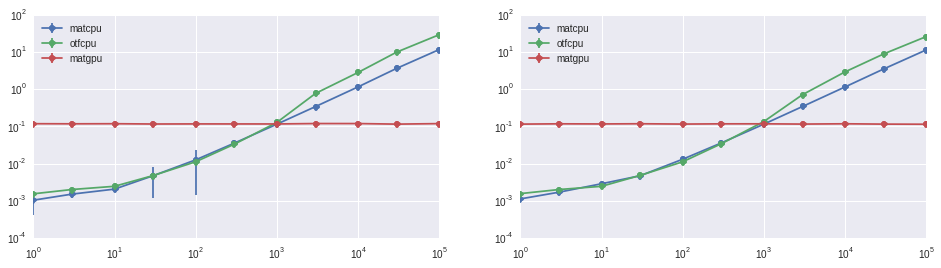

In [25]:
plt.figure(figsize=(16, 4))
for subplot, hh in enumerate([10, 10000]):
    plt.subplot(1, 2, 1 + subplot)
    df = matcpuob.ix[hh]
    plt.errorbar(df.index, df['compute']['median'], yerr=1.96 * df['compute']['sem'].values,
                 marker="o",
                 label="matcpu")
    df = otfcpu.ix[hh]
    plt.errorbar(df.index, df['compute']['median'], yerr=1.96 * df['compute']['sem'].values,
                 marker="o",
                 label="otfcpu")
    df = matgpuopt.ix[hh]
    plt.errorbar(df.index, df['compute']['median'], yerr=1.96 * df['compute']['sem'].values,
                 marker="o",
                 label="matgpu")
    plt.legend(loc="upper left")
    plt.loglog()
    plt.ylim(0.0001, 100)

/home/vlad/conda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


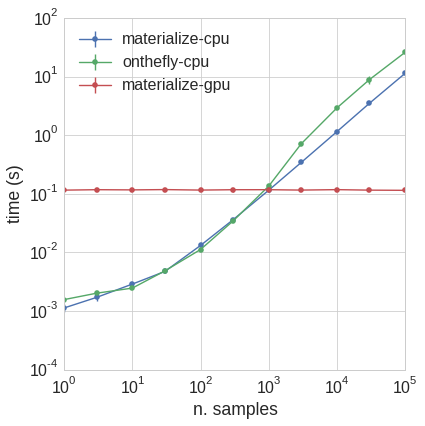

In [52]:
plt.figure(figsize=(6, 6))
hh = 10000
df = matcpuob.ix[hh]
plt.errorbar(df.index, df['compute']['median'], yerr=1.96 * df['compute']['sem'].values,
             marker="o",
             label="materialize-cpu")
df = otfcpu.ix[hh]
plt.errorbar(df.index, df['compute']['median'], yerr=1.96 * df['compute']['sem'].values,
             marker="o",
             label="onthefly-cpu")
df = matgpuopt.ix[hh]
plt.errorbar(df.index, df['compute']['median'], yerr=1.96 * df['compute']['sem'].values,
             marker="o",
             label="materialize-gpu")
plt.legend(loc="upper left")
plt.loglog()
plt.ylabel("time (s)")
plt.xlabel("n. samples")
plt.ylim(0.0001, 100)
plt.tight_layout()
plt.savefig("plots/compute_time.pdf")